<a href="https://colab.research.google.com/github/ronen-halevy/ai-notebooks/blob/main/notebooks/yolov3_anchor_boxes_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating YOLOv3 Anchor Boxes by K-Means Clustering

This post presents the calculation of YOLOv3 9 anchor boxes. 
The anchor boxes are calculated by running K-Means clustering over the dataset examples bounding boxes.

Here below we will generate dummy bounding boxes examples to illustrate the calculation.

The code below is divided into 3 parts:
1. Generation of dummy bounding boxes examples
2. K-Means calculation
3. Plots


###1. Generation of dummy bounding boxes examples

12000 random sized boxes, 0 < width < 30, 0 < height < 50:


In [3]:
import random
import numpy as np


w_h = []
num_of_examples = 12000

max_width = 30
max_height = 50
for index in range(num_of_examples):
  w_h.append([random.random() * max_width, random.random() * max_height])

w_h = np.array(w_h)

###2. K-Means calculation

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=9)
kmeans.fit(w_h)
anchors = np.round(kmeans.cluster_centers_)
print('selected anchoanchors:\n', anchors)

selected anchoanchors:
 [[23. 32.]
 [ 7.  6.]
 [ 7. 44.]
 [23.  6.]
 [ 5. 20.]
 [ 8. 33.]
 [22. 44.]
 [25. 19.]
 [15. 19.]]


### 3. Plots

#### Scatter Plot of K-means Clustering of Boxes Widths and Heights

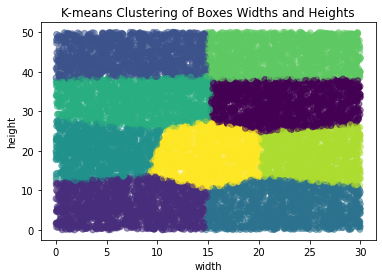

<Figure size 720x720 with 0 Axes>

In [5]:
image_width = 2 * max(w_h[..., 0])
image_height = 2 * max(w_h[..., 1])

plt.scatter(w_h[..., 0], w_h[..., 1], c=kmeans.labels_, alpha=0.5)
plt.xlabel("width")
plt.ylabel("height")
plt.title('K-means Clustering of Boxes Widths and Heights')
plt.figure(figsize=(10, 10))
plt.show()


#### Plot of 9 Resultant Bounding Boxes

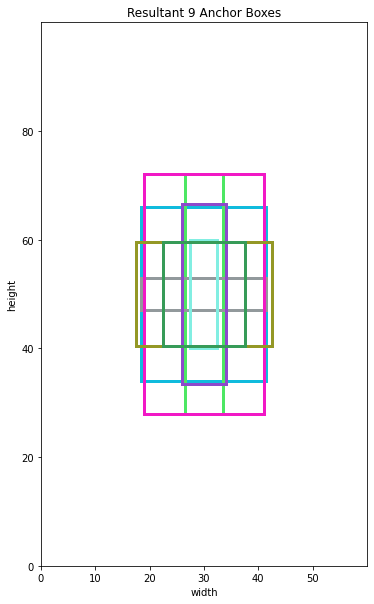

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
c_w, c_h = image_width / 2, image_height / 2

for index, anchor in enumerate(anchors):
  rectangle = plt.Rectangle((c_w - anchor[0] / 2, c_h - anchor[1] / 2), anchor[0], anchor[1], linewidth=3,
                                  edgecolor=list(np.random.choice(range(255), size=3) / 255)
                                  , facecolor='none')
  ax.add_patch(rectangle)
ax.set_aspect(1.0)
plt.axis([0, image_width, 0, image_height])
plt.xlabel("width")
plt.ylabel("height")
plt.title('Resultant 9 Anchor Boxes')
plt.show()
